In [1]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Iris

In [2]:
data = datasets.load_iris()
X = data.data[:, :2]  
y = data.target
# import pandas as pd
# y = pd.get_dummies(y)
X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,task_type='GPU', 
                           save_snapshot=True, snapshot_file='SaveModel',
                           snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.4926296234
bestIteration = 180
Shrink model to first 181 iterations.


In [4]:
Model.score(X_Test, y_Test)

0.78

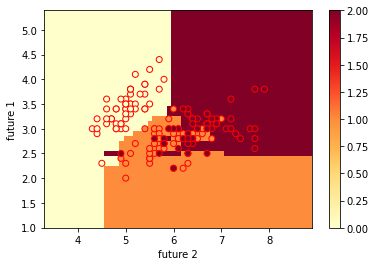

In [5]:
h=0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=plt.cm.YlOrRd)
plt.ylabel('future 1')
plt.xlabel('future 2')

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.YlOrRd,edgecolors="r")
plt.ylabel('future 1')
plt.xlabel('future 2')
plt.colorbar()

## mnist

In [6]:
data = datasets.load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target

X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel1', snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test))

0:	learn: 2.1619332	test: 2.1647608	best: 2.1647608 (0)	total: 28ms	remaining: 27.9s
1:	learn: 2.0473815	test: 2.0526417	best: 2.0526417 (1)	total: 54ms	remaining: 26.9s
2:	learn: 1.9302779	test: 1.9372049	best: 1.9372049 (2)	total: 78.7ms	remaining: 26.2s
3:	learn: 1.8283590	test: 1.8443793	best: 1.8443793 (3)	total: 107ms	remaining: 26.5s
4:	learn: 1.7378900	test: 1.7568456	best: 1.7568456 (4)	total: 134ms	remaining: 26.7s
5:	learn: 1.6647037	test: 1.6886404	best: 1.6886404 (5)	total: 160ms	remaining: 26.5s
6:	learn: 1.5942046	test: 1.6222259	best: 1.6222259 (6)	total: 186ms	remaining: 26.4s
7:	learn: 1.5256536	test: 1.5579156	best: 1.5579156 (7)	total: 211ms	remaining: 26.2s
8:	learn: 1.4643821	test: 1.4981120	best: 1.4981120 (8)	total: 235ms	remaining: 25.9s
9:	learn: 1.4112254	test: 1.4493398	best: 1.4493398 (9)	total: 261ms	remaining: 25.8s
10:	learn: 1.3614197	test: 1.4019053	best: 1.4019053 (10)	total: 287ms	remaining: 25.8s
11:	learn: 1.3134293	test: 1.3576605	best: 1.3576605 

101:	learn: 0.2272526	test: 0.3191528	best: 0.3191528 (101)	total: 2.51s	remaining: 22.1s
102:	learn: 0.2247637	test: 0.3166468	best: 0.3166468 (102)	total: 2.53s	remaining: 22.1s
103:	learn: 0.2223077	test: 0.3144082	best: 0.3144082 (103)	total: 2.56s	remaining: 22s
104:	learn: 0.2197334	test: 0.3119832	best: 0.3119832 (104)	total: 2.58s	remaining: 22s
105:	learn: 0.2173175	test: 0.3094257	best: 0.3094257 (105)	total: 2.6s	remaining: 21.9s
106:	learn: 0.2148552	test: 0.3070301	best: 0.3070301 (106)	total: 2.62s	remaining: 21.9s
107:	learn: 0.2124889	test: 0.3045291	best: 0.3045291 (107)	total: 2.64s	remaining: 21.8s
108:	learn: 0.2105371	test: 0.3025784	best: 0.3025784 (108)	total: 2.66s	remaining: 21.8s
109:	learn: 0.2080022	test: 0.2998048	best: 0.2998048 (109)	total: 2.69s	remaining: 21.7s
110:	learn: 0.2060106	test: 0.2978856	best: 0.2978856 (110)	total: 2.71s	remaining: 21.7s
111:	learn: 0.2038727	test: 0.2957262	best: 0.2957262 (111)	total: 2.73s	remaining: 21.7s
112:	learn: 0.2

196:	learn: 0.1022438	test: 0.1905231	best: 0.1905231 (196)	total: 4.57s	remaining: 18.6s
197:	learn: 0.1015628	test: 0.1898376	best: 0.1898376 (197)	total: 4.59s	remaining: 18.6s
198:	learn: 0.1009128	test: 0.1892653	best: 0.1892653 (198)	total: 4.62s	remaining: 18.6s
199:	learn: 0.1004546	test: 0.1890793	best: 0.1890793 (199)	total: 4.63s	remaining: 18.5s
200:	learn: 0.0998032	test: 0.1883090	best: 0.1883090 (200)	total: 4.66s	remaining: 18.5s
201:	learn: 0.0990749	test: 0.1875287	best: 0.1875287 (201)	total: 4.68s	remaining: 18.5s
202:	learn: 0.0986677	test: 0.1873887	best: 0.1873887 (202)	total: 4.7s	remaining: 18.4s
203:	learn: 0.0979286	test: 0.1866611	best: 0.1866611 (203)	total: 4.72s	remaining: 18.4s
204:	learn: 0.0971745	test: 0.1858774	best: 0.1858774 (204)	total: 4.75s	remaining: 18.4s
205:	learn: 0.0966325	test: 0.1853154	best: 0.1853154 (205)	total: 4.77s	remaining: 18.4s
206:	learn: 0.0960131	test: 0.1844971	best: 0.1844971 (206)	total: 4.79s	remaining: 18.4s
207:	learn:

294:	learn: 0.0622186	test: 0.1464558	best: 0.1464558 (294)	total: 6.68s	remaining: 16s
295:	learn: 0.0619930	test: 0.1461862	best: 0.1461862 (295)	total: 6.7s	remaining: 15.9s
296:	learn: 0.0616632	test: 0.1458550	best: 0.1458550 (296)	total: 6.72s	remaining: 15.9s
297:	learn: 0.0615294	test: 0.1457311	best: 0.1457311 (297)	total: 6.74s	remaining: 15.9s
298:	learn: 0.0612254	test: 0.1452862	best: 0.1452862 (298)	total: 6.77s	remaining: 15.9s
299:	learn: 0.0609161	test: 0.1449313	best: 0.1449313 (299)	total: 6.79s	remaining: 15.8s
300:	learn: 0.0607098	test: 0.1447045	best: 0.1447045 (300)	total: 6.81s	remaining: 15.8s
301:	learn: 0.0604728	test: 0.1443132	best: 0.1443132 (301)	total: 6.84s	remaining: 15.8s
302:	learn: 0.0601986	test: 0.1439322	best: 0.1439322 (302)	total: 6.87s	remaining: 15.8s
303:	learn: 0.0600014	test: 0.1436700	best: 0.1436700 (303)	total: 6.88s	remaining: 15.8s
304:	learn: 0.0597300	test: 0.1432757	best: 0.1432757 (304)	total: 6.91s	remaining: 15.7s
305:	learn: 0

390:	learn: 0.0436070	test: 0.1233998	best: 0.1233998 (390)	total: 8.76s	remaining: 13.6s
391:	learn: 0.0434579	test: 0.1232344	best: 0.1232344 (391)	total: 8.78s	remaining: 13.6s
392:	learn: 0.0432799	test: 0.1230948	best: 0.1230948 (392)	total: 8.8s	remaining: 13.6s
393:	learn: 0.0431802	test: 0.1230527	best: 0.1230527 (393)	total: 8.81s	remaining: 13.6s
394:	learn: 0.0430430	test: 0.1228996	best: 0.1228996 (394)	total: 8.84s	remaining: 13.5s
395:	learn: 0.0428964	test: 0.1227408	best: 0.1227408 (395)	total: 8.86s	remaining: 13.5s
396:	learn: 0.0427426	test: 0.1223936	best: 0.1223936 (396)	total: 8.88s	remaining: 13.5s
397:	learn: 0.0426277	test: 0.1222250	best: 0.1222250 (397)	total: 8.9s	remaining: 13.5s
398:	learn: 0.0425063	test: 0.1220736	best: 0.1220736 (398)	total: 8.92s	remaining: 13.4s
399:	learn: 0.0423427	test: 0.1217933	best: 0.1217933 (399)	total: 8.94s	remaining: 13.4s
400:	learn: 0.0422929	test: 0.1217851	best: 0.1217851 (400)	total: 8.96s	remaining: 13.4s
401:	learn: 

488:	learn: 0.0330062	test: 0.1100652	best: 0.1100652 (488)	total: 10.8s	remaining: 11.3s
489:	learn: 0.0329274	test: 0.1099040	best: 0.1099040 (489)	total: 10.8s	remaining: 11.2s
490:	learn: 0.0328686	test: 0.1098572	best: 0.1098572 (490)	total: 10.8s	remaining: 11.2s
491:	learn: 0.0327583	test: 0.1096616	best: 0.1096616 (491)	total: 10.8s	remaining: 11.2s
492:	learn: 0.0326557	test: 0.1095488	best: 0.1095488 (492)	total: 10.9s	remaining: 11.2s
493:	learn: 0.0325888	test: 0.1094486	best: 0.1094486 (493)	total: 10.9s	remaining: 11.2s
494:	learn: 0.0325386	test: 0.1094509	best: 0.1094486 (493)	total: 10.9s	remaining: 11.1s
495:	learn: 0.0324462	test: 0.1093700	best: 0.1093700 (495)	total: 10.9s	remaining: 11.1s
496:	learn: 0.0323390	test: 0.1092648	best: 0.1092648 (496)	total: 10.9s	remaining: 11.1s
497:	learn: 0.0322411	test: 0.1092069	best: 0.1092069 (497)	total: 11s	remaining: 11.1s
498:	learn: 0.0321492	test: 0.1090618	best: 0.1090618 (498)	total: 11s	remaining: 11s
499:	learn: 0.03

580:	learn: 0.0266402	test: 0.1016300	best: 0.1016300 (580)	total: 12.6s	remaining: 9.11s
581:	learn: 0.0265766	test: 0.1015489	best: 0.1015489 (581)	total: 12.7s	remaining: 9.09s
582:	learn: 0.0265030	test: 0.1014888	best: 0.1014888 (582)	total: 12.7s	remaining: 9.07s
583:	learn: 0.0264204	test: 0.1014075	best: 0.1014075 (583)	total: 12.7s	remaining: 9.04s
584:	learn: 0.0263387	test: 0.1012128	best: 0.1012128 (584)	total: 12.7s	remaining: 9.02s
585:	learn: 0.0262752	test: 0.1011392	best: 0.1011392 (585)	total: 12.7s	remaining: 9s
586:	learn: 0.0262129	test: 0.1010753	best: 0.1010753 (586)	total: 12.8s	remaining: 8.97s
587:	learn: 0.0261596	test: 0.1009983	best: 0.1009983 (587)	total: 12.8s	remaining: 8.95s
588:	learn: 0.0261062	test: 0.1008893	best: 0.1008893 (588)	total: 12.8s	remaining: 8.93s
589:	learn: 0.0260812	test: 0.1008094	best: 0.1008094 (589)	total: 12.8s	remaining: 8.9s
590:	learn: 0.0260339	test: 0.1007038	best: 0.1007038 (590)	total: 12.8s	remaining: 8.88s
591:	learn: 0.

673:	learn: 0.0222016	test: 0.0948656	best: 0.0948656 (673)	total: 14.5s	remaining: 7.02s
674:	learn: 0.0221546	test: 0.0948521	best: 0.0948521 (674)	total: 14.5s	remaining: 7s
675:	learn: 0.0220930	test: 0.0947566	best: 0.0947566 (675)	total: 14.6s	remaining: 6.97s
676:	learn: 0.0220478	test: 0.0946494	best: 0.0946494 (676)	total: 14.6s	remaining: 6.95s
677:	learn: 0.0220154	test: 0.0945756	best: 0.0945756 (677)	total: 14.6s	remaining: 6.93s
678:	learn: 0.0219634	test: 0.0945059	best: 0.0945059 (678)	total: 14.6s	remaining: 6.91s
679:	learn: 0.0219198	test: 0.0944276	best: 0.0944276 (679)	total: 14.6s	remaining: 6.89s
680:	learn: 0.0218879	test: 0.0943601	best: 0.0943601 (680)	total: 14.7s	remaining: 6.86s
681:	learn: 0.0218695	test: 0.0943507	best: 0.0943507 (681)	total: 14.7s	remaining: 6.84s
682:	learn: 0.0218509	test: 0.0943228	best: 0.0943228 (682)	total: 14.7s	remaining: 6.82s
683:	learn: 0.0218144	test: 0.0942905	best: 0.0942905 (683)	total: 14.7s	remaining: 6.79s
684:	learn: 0

770:	learn: 0.0186531	test: 0.0894146	best: 0.0894146 (770)	total: 16.6s	remaining: 4.93s
771:	learn: 0.0186449	test: 0.0893918	best: 0.0893918 (771)	total: 16.6s	remaining: 4.91s
772:	learn: 0.0186144	test: 0.0893768	best: 0.0893768 (772)	total: 16.6s	remaining: 4.88s
773:	learn: 0.0185794	test: 0.0892756	best: 0.0892756 (773)	total: 16.7s	remaining: 4.86s
774:	learn: 0.0185566	test: 0.0892082	best: 0.0892082 (774)	total: 16.7s	remaining: 4.84s
775:	learn: 0.0185181	test: 0.0891860	best: 0.0891860 (775)	total: 16.7s	remaining: 4.82s
776:	learn: 0.0185050	test: 0.0891683	best: 0.0891683 (776)	total: 16.7s	remaining: 4.79s
777:	learn: 0.0184763	test: 0.0891446	best: 0.0891446 (777)	total: 16.7s	remaining: 4.77s
778:	learn: 0.0184674	test: 0.0891131	best: 0.0891131 (778)	total: 16.7s	remaining: 4.75s
779:	learn: 0.0184386	test: 0.0890831	best: 0.0890831 (779)	total: 16.8s	remaining: 4.73s
780:	learn: 0.0184134	test: 0.0890619	best: 0.0890619 (780)	total: 16.8s	remaining: 4.71s
781:	learn

867:	learn: 0.0161511	test: 0.0857084	best: 0.0857084 (867)	total: 18.6s	remaining: 2.83s
868:	learn: 0.0161349	test: 0.0856994	best: 0.0856994 (868)	total: 18.6s	remaining: 2.81s
869:	learn: 0.0161184	test: 0.0856714	best: 0.0856714 (869)	total: 18.6s	remaining: 2.79s
870:	learn: 0.0161031	test: 0.0856582	best: 0.0856582 (870)	total: 18.7s	remaining: 2.76s
871:	learn: 0.0160748	test: 0.0855825	best: 0.0855825 (871)	total: 18.7s	remaining: 2.74s
872:	learn: 0.0160534	test: 0.0855581	best: 0.0855581 (872)	total: 18.7s	remaining: 2.72s
873:	learn: 0.0160342	test: 0.0855345	best: 0.0855345 (873)	total: 18.7s	remaining: 2.7s
874:	learn: 0.0160157	test: 0.0855385	best: 0.0855345 (873)	total: 18.7s	remaining: 2.68s
875:	learn: 0.0159835	test: 0.0854601	best: 0.0854601 (875)	total: 18.8s	remaining: 2.66s
876:	learn: 0.0159513	test: 0.0854145	best: 0.0854145 (876)	total: 18.8s	remaining: 2.63s
877:	learn: 0.0159192	test: 0.0853588	best: 0.0853588 (877)	total: 18.8s	remaining: 2.61s
878:	learn:

966:	learn: 0.0141973	test: 0.0826625	best: 0.0826625 (966)	total: 20.6s	remaining: 704ms
967:	learn: 0.0141824	test: 0.0825954	best: 0.0825954 (967)	total: 20.6s	remaining: 683ms
968:	learn: 0.0141672	test: 0.0826016	best: 0.0825954 (967)	total: 20.7s	remaining: 661ms
969:	learn: 0.0141366	test: 0.0825946	best: 0.0825946 (969)	total: 20.7s	remaining: 640ms
970:	learn: 0.0141292	test: 0.0825796	best: 0.0825796 (970)	total: 20.7s	remaining: 618ms
971:	learn: 0.0141161	test: 0.0825444	best: 0.0825444 (971)	total: 20.7s	remaining: 597ms
972:	learn: 0.0140979	test: 0.0824988	best: 0.0824988 (972)	total: 20.7s	remaining: 576ms
973:	learn: 0.0140795	test: 0.0824801	best: 0.0824801 (973)	total: 20.8s	remaining: 554ms
974:	learn: 0.0140717	test: 0.0824598	best: 0.0824598 (974)	total: 20.8s	remaining: 533ms
975:	learn: 0.0140568	test: 0.0824291	best: 0.0824291 (975)	total: 20.8s	remaining: 512ms
976:	learn: 0.0140508	test: 0.0824165	best: 0.0824165 (976)	total: 20.8s	remaining: 490ms
977:	learn

In [8]:
Model.score(X_Test, y_Test)

0.9797979797979798